# Polynomial regression
En muchas ocasiones la relación entre los datos no va a ser lineal, por lo que una simple regresión lineal no se va a ajustar bien a nuestra problemática.

Por ejemplo, en el siguiente ejemplo encajaria muy bien una regresión lineal.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

df = pd.read_csv('data/salary_data.csv')
df.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [2]:
import numpy as np

In [12]:
x = np.array([0,1,2,3,4,5,6,7,8,9]).reshape(-1, 1)
x_estirao = x**2
y = np.array([0,0.5,6, 8,13,28,31,50,60,83])

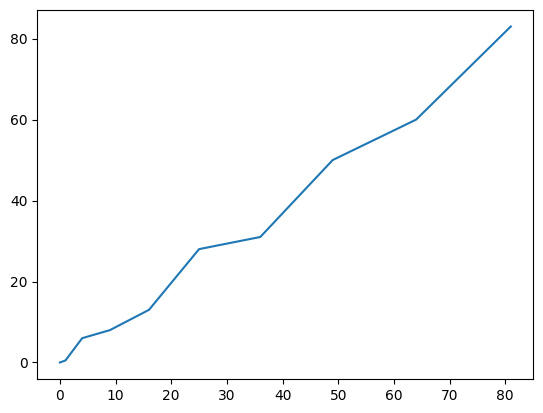

In [13]:
plt.plot(x_estirao, y)

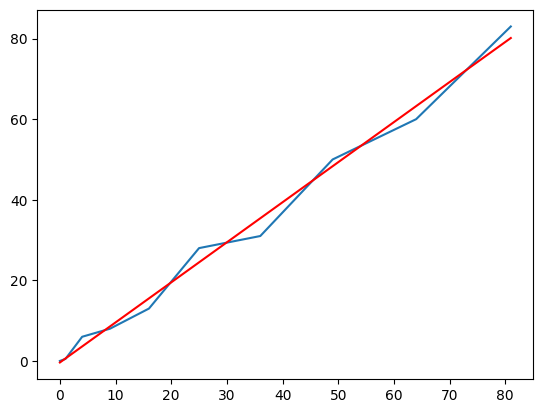

In [14]:
from sklearn.linear_model import LinearRegression
lm  = LinearRegression()
lm.fit(x_estirao, y)
predictions = lm.predict(x_estirao)

plt.plot(x_estirao, y)
plt.plot(x_estirao, predictions, "r")

In [15]:
X = df[['YearsExperience']]
y = df['Salary']

In [16]:
lin_reg = LinearRegression()

In [17]:
lin_reg.fit(X, y)

LinearRegression()

In [18]:
lin_reg.score(X,y)

0.9569566641435086

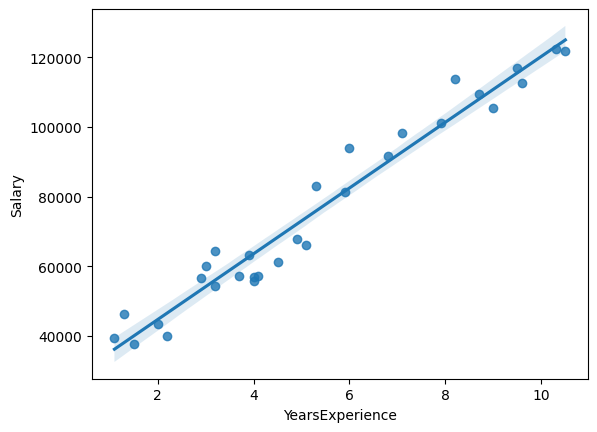

In [19]:
sns.regplot(data = df,
           x = 'YearsExperience',
           y = 'Salary');

En la vida real los problemas son más complejos, ya que los salarios no llevan una subida lineal vs años de experiencia, dependerá también de la carrera profesional: profesor, ingeniero, doctor...

Otra posible representación del salario podría ser en función del puesto de trabajo.

In [20]:
df = pd.read_csv('data/position_salaries.csv')
df

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [21]:
X = df.iloc[:, 1:2].values
y = df.iloc[:, 2].values

In [22]:
X

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]])

In [23]:
y

array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
        300000,  500000, 1000000])

In [24]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression()

In [25]:
lin_reg.score(X,y)

0.6690412331929895

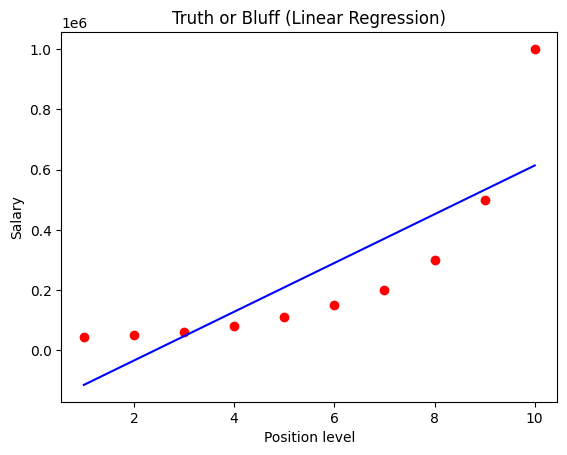

In [26]:
# Visualizing the Linear Regression results
def viz_linear():
    plt.scatter(X, y, color='red')
    plt.plot(X, lin_reg.predict(X), color='blue')
    plt.title('Truth or Bluff (Linear Regression)')
    plt.xlabel('Position level')
    plt.ylabel('Salary')
    plt.show()
    return
viz_linear()

Vemos que en este caso, la regresión lineal no se ajusta nada bien a los datos, por lo que habrá que probar otras alternativas.

C:\Users\Ort\AppData\Local\Temp\ipykernel_13864\4008593066.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y - lin_reg.predict(X));


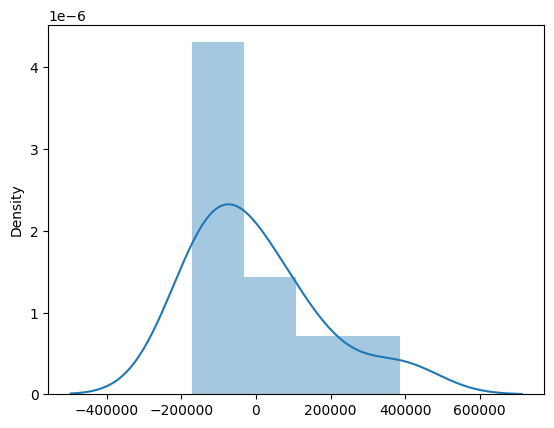

In [27]:
sns.distplot(y - lin_reg.predict(X));

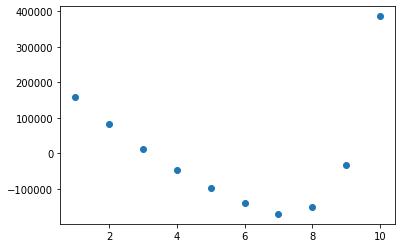

In [19]:
plt.scatter(X, y - lin_reg.predict(X));

`PolynomialFeatures` de sklearn genera nuevas features sintéticas, realizando todas las combinaciones posibles entre las potencias.

Si degree = 2 y tenemos dos features, devolverá: a^0, a^1, b^1, a^2, a\*b, b^2

En nuestro caso tenemos una única variable con degree = 3: a^0, a^1, a^2, a^3

In [29]:
feats = pd.DataFrame({"a": [1,2,3,4,5,6,7], "b":[10, 20, 30 ,40 , 50, 60, 70]})

In [30]:
from sklearn.preprocessing import PolynomialFeatures

In [31]:
feats

,a,b
0,1,10
1,2,20
2,3,30
3,4,40
4,5,50
5,6,60
6,7,70


In [47]:
poly_feats = PolynomialFeatures(degree = 2)
poly_feats.fit(feats)
pd.DataFrame(poly_feats.transform(feats))

,0,1,2,3,4,5
0,1.0,1.0,10.0,1.0,10.0,100.0
1,1.0,2.0,20.0,4.0,40.0,400.0
2,1.0,3.0,30.0,9.0,90.0,900.0
3,1.0,4.0,40.0,16.0,160.0,1600.0
4,1.0,5.0,50.0,25.0,250.0,2500.0
5,1.0,6.0,60.0,36.0,360.0,3600.0
6,1.0,7.0,70.0,49.0,490.0,4900.0


In [48]:
feats

,a,b
0,1,10
1,2,20
2,3,30
3,4,40
4,5,50
5,6,60
6,7,70


In [49]:
X

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]])

In [50]:
from sklearn.preprocessing import PolynomialFeatures
for degree in range(1, 10):
    poly_feats = PolynomialFeatures(degree = degree)
    poly_feats.fit(X)
    X_poly = poly_feats.transform(X)
    pol_reg = LinearRegression()
    pol_reg.fit(X_poly, y)
    score = pol_reg.score(X_poly, y)
    print(f"Para el degree {degree}, el score es de: {score}")
    

Para el degree 1, el score es de: 0.6690412331929895
Para el degree 2, el score es de: 0.9162082221443942
Para el degree 3, el score es de: 0.9812097727913366
Para el degree 4, el score es de: 0.9973922891706614
Para el degree 5, el score es de: 0.9997969027099755
Para el degree 6, el score es de: 0.9999494749253776
Para el degree 7, el score es de: 0.9999770143729169
Para el degree 8, el score es de: 0.9999934972438329
Para el degree 9, el score es de: 0.9999999999999825


In [51]:
from sklearn.preprocessing import PolynomialFeatures
poly_feats = PolynomialFeatures(degree = 4)
poly_feats.fit(X)
X_poly = poly_feats.transform(X)
X_poly

array([[1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00],
       [1.000e+00, 2.000e+00, 4.000e+00, 8.000e+00, 1.600e+01],
       [1.000e+00, 3.000e+00, 9.000e+00, 2.700e+01, 8.100e+01],
       [1.000e+00, 4.000e+00, 1.600e+01, 6.400e+01, 2.560e+02],
       [1.000e+00, 5.000e+00, 2.500e+01, 1.250e+02, 6.250e+02],
       [1.000e+00, 6.000e+00, 3.600e+01, 2.160e+02, 1.296e+03],
       [1.000e+00, 7.000e+00, 4.900e+01, 3.430e+02, 2.401e+03],
       [1.000e+00, 8.000e+00, 6.400e+01, 5.120e+02, 4.096e+03],
       [1.000e+00, 9.000e+00, 8.100e+01, 7.290e+02, 6.561e+03],
       [1.000e+00, 1.000e+01, 1.000e+02, 1.000e+03, 1.000e+04]])

In [52]:
X_poly2 = X_poly[:, 2:3]

In [53]:
X_poly3 = X_poly[:,3:4]

In [54]:
X_poly4 = X_poly[:,4:5]

In [55]:
X_poly4

array([[1.000e+00],
       [1.600e+01],
       [8.100e+01],
       [2.560e+02],
       [6.250e+02],
       [1.296e+03],
       [2.401e+03],
       [4.096e+03],
       [6.561e+03],
       [1.000e+04]])

In [59]:
pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)

LinearRegression()

In [60]:
pol_reg.score(X_poly, y)

0.9973922891706614

`x^0 + x^1 + x^2 + x^3 + x^4 `

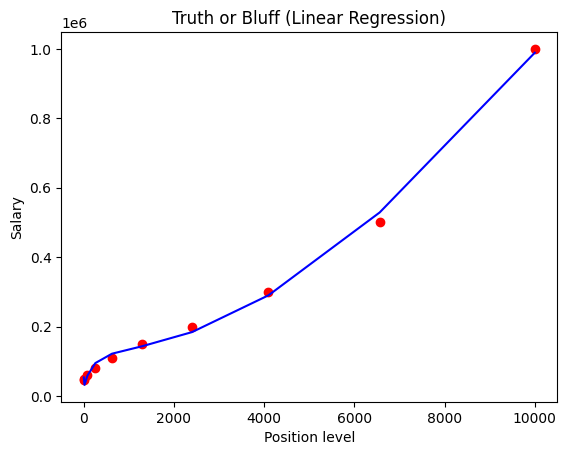

In [61]:
# Visualizing the Polymonial Regression results
def viz_polymonial():
    plt.scatter(X_poly4, y, color='red')
    plt.plot(X_poly4, pol_reg.predict(X_poly), color='blue')
    plt.title('Truth or Bluff (Linear Regression)')
    plt.xlabel('Position level')
    plt.ylabel('Salary')
    plt.show()
    return
viz_polymonial()

In [32]:
pol_reg.score(X_poly,y)

0.9812097727913367

Al añadir mucha complejidad podemos sobreajustar el modelo fácilmente

In [49]:
print(lin_reg.predict([[7.3]]))

[395081.81818182]


In [50]:
print(pol_reg.predict(poly_feats.transform([[7.3]])))

[213110.8916084]


In [67]:
df = pd.read_csv('data/position_salaries.csv')
X = df.iloc[:, 1:2].values
y = df.iloc[:, 2].values

In [68]:
df

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


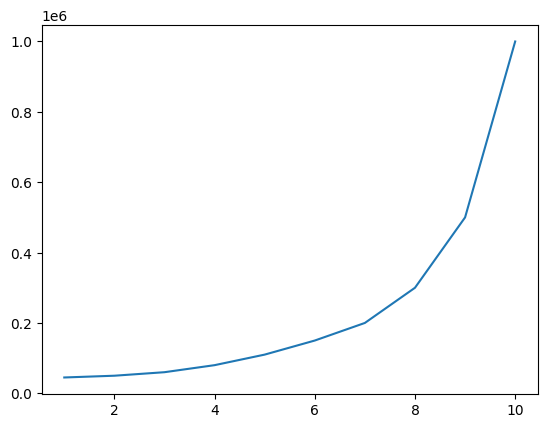

In [69]:
plt.plot(df.Level, df.Salary)

In [103]:
from sklearn.preprocessing import PolynomialFeatures
poly_feats = PolynomialFeatures(degree = 4)
poly_feats.fit(X)
X_poly = poly_feats.transform(X)
X_poly

array([[1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00],
       [1.000e+00, 2.000e+00, 4.000e+00, 8.000e+00, 1.600e+01],
       [1.000e+00, 3.000e+00, 9.000e+00, 2.700e+01, 8.100e+01],
       [1.000e+00, 4.000e+00, 1.600e+01, 6.400e+01, 2.560e+02],
       [1.000e+00, 5.000e+00, 2.500e+01, 1.250e+02, 6.250e+02],
       [1.000e+00, 6.000e+00, 3.600e+01, 2.160e+02, 1.296e+03],
       [1.000e+00, 7.000e+00, 4.900e+01, 3.430e+02, 2.401e+03],
       [1.000e+00, 8.000e+00, 6.400e+01, 5.120e+02, 4.096e+03],
       [1.000e+00, 9.000e+00, 8.100e+01, 7.290e+02, 6.561e+03],
       [1.000e+00, 1.000e+01, 1.000e+02, 1.000e+03, 1.000e+04]])

In [104]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_poly,y, test_size = 0.2, random_state=42)

In [105]:
X_train

array([[1.000e+00, 6.000e+00, 3.600e+01, 2.160e+02, 1.296e+03],
       [1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00],
       [1.000e+00, 8.000e+00, 6.400e+01, 5.120e+02, 4.096e+03],
       [1.000e+00, 3.000e+00, 9.000e+00, 2.700e+01, 8.100e+01],
       [1.000e+00, 1.000e+01, 1.000e+02, 1.000e+03, 1.000e+04],
       [1.000e+00, 5.000e+00, 2.500e+01, 1.250e+02, 6.250e+02],
       [1.000e+00, 4.000e+00, 1.600e+01, 6.400e+01, 2.560e+02],
       [1.000e+00, 7.000e+00, 4.900e+01, 3.430e+02, 2.401e+03]])

In [106]:
X_test

array([[1.000e+00, 9.000e+00, 8.100e+01, 7.290e+02, 6.561e+03],
       [1.000e+00, 2.000e+00, 4.000e+00, 8.000e+00, 1.600e+01]])

In [107]:
pol_reg = LinearRegression()
pol_reg.fit(X_train, y_train)

LinearRegression()

In [108]:
predictions = pol_reg.predict(X_test)

In [109]:
df_preds = pd.DataFrame(predictions, columns = ['predictions'])
df_preds['real_value'] = pd.Series(y_test)

df_preds

,predictions,real_value
0,548738.145307,500000
1,27337.436088,50000


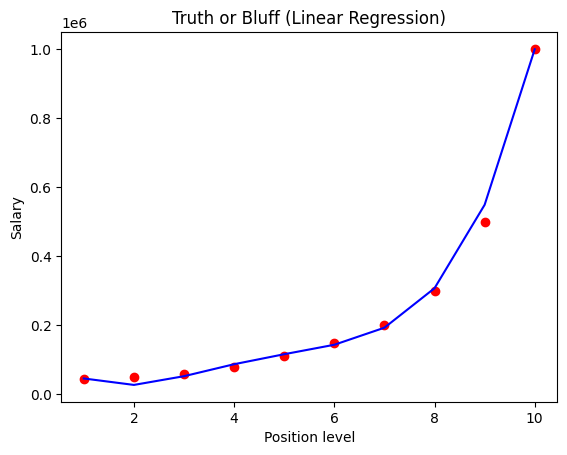

In [110]:
# Visualizing the Polymonial Regression results
def viz_polymonial():
    plt.scatter(X, y, color='red')
    plt.plot(X, pol_reg.predict(X_poly), color='blue')
    plt.title('Truth or Bluff (Linear Regression)')
    plt.xlabel('Position level')
    plt.ylabel('Salary')
    plt.show()
    return
viz_polymonial()

In [111]:
from sklearn.metrics import r2_score
r2_score(pol_reg.predict(X_test), y_test)

0.9787463221474533

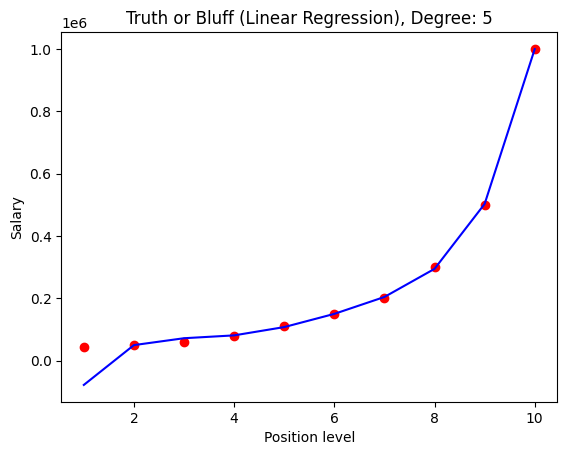

train: 0.9999107224415583
test: -0.3569600903946355


In [128]:
# TRANSFORMO EL DATO -> POLINOMIO DE GRADO D

degree = 5

from sklearn.preprocessing import PolynomialFeatures
poly_feats = PolynomialFeatures(degree = degree)
poly_feats.fit(X)
X_poly = poly_feats.transform(X)

# TRAIN TEST SPLIT
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_poly,y, test_size = 0.2, random_state=np.random.randint(0,10000))

# ENTRENO MODELO LINEAL
pol_reg = LinearRegression()
pol_reg.fit(X_train, y_train)

# Visualizing the Polymonial Regression results
def viz_polymonial():
    plt.scatter(X, y, color='red')
    plt.plot(X, pol_reg.predict(X_poly), color='blue')
    plt.title(f'Truth or Bluff (Linear Regression), Degree: {degree}')
    plt.xlabel('Position level')
    plt.ylabel('Salary')
    plt.show()
    return
viz_polymonial()

# METRICAS
from sklearn.metrics import r2_score
print("train:", r2_score(pol_reg.predict(X_train), y_train))
print("test:", r2_score(pol_reg.predict(X_test), y_test))